In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#import xgboost as xgb

# Additional tweaking
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

#sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [2]:
train = pd.read_csv("train_week3_newest_2.csv")

In [3]:
test = pd.read_csv("test_week3_newest_2.csv")

# Adjusting features so that it makes sense

In [64]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc',
       'is_train', 'song_year', 'membership_days', 'registration_year',
       'registration_month', 'registration_date', 'expiration_year',
       'expiration_month', 'genre_ids_count', 'lyricists_count',
       'composer_count', 'is_featured', 'artist_count', 'artist_composer',
       'artist_composer_lyricist', 'smaller_song', 'count_song_played',
       'count_artist_played', 'num_songs_for_artist',
       'num_languages_for_artist'],
      dtype='object')

### Adjusting bd(age) feature: 

In [65]:
train.bd.value_counts()

 0.0       2940499
 25.0       261906
 24.0       258688
 26.0       257869
 22.0       255731
 27.0       253065
 28.0       232548
 23.0       228255
 21.0       222087
 29.0       211192
 30.0       203157
 20.0       189439
 31.0       161844
 32.0       151544
 19.0       141066
 33.0       127455
 18.0       124868
 34.0       115324
 35.0       112529
 17.0        87119
 36.0        82632
 37.0        79722
 38.0        75166
 40.0        54284
 39.0        52676
 41.0        51378
 16.0        42164
 43.0        35301
 44.0        33542
 45.0        31929
 42.0        31695
 47.0        31195
 46.0        30650
 50.0        21613
 49.0        20865
 48.0        19532
 51.0        18568
 54.0        14372
 53.0        14261
 52.0        12576
 55.0        11041
 15.0         9901
 59.0         6337
 57.0         6151
 60.0         6078
 58.0         5955
 14.0         5621
 56.0         5307
 65.0         2584
 62.0         2580
 67.0         2508
 63.0         2494
 64.0       

In [69]:
# From wikipedia: oldest people: 122 years old
# taking into account of tyle of users who will use the app to listen to music: 
# https://www.statista.com/statistics/475821/spotify-users-age-usa/
# impute ages larger than 80 as the mode of age feature: 25


In [4]:
train.loc[train.bd == 103, 'bd'] = 3
train.loc[train.bd == 111, 'bd'] = 11
train.loc[train.bd == 1030, 'bd'] = 30
train.loc[train.bd == 105, 'bd'] = 5
train.loc[train.bd == 931, 'bd'] = 31
train.loc[train.bd == 144, 'bd'] = 44
train.loc[train.bd == 131, 'bd'] = 31
train.loc[train.bd == -43, 'bd'] = 43
train.loc[train.bd == 107, 'bd'] = 7
train.loc[train.bd == 112, 'bd'] = 12
train.loc[train.bd == -38, 'bd'] = 38
train.loc[train.bd == 102, 'bd'] = 2
train.loc[train.bd == 106, 'bd'] = 6
train.loc[train.bd == 1051, 'bd'] = 51


train.loc[train.bd > 100, 'bd'] = 25

In [71]:
train.bd.value_counts()

0.0     2940499
25.0     261906
24.0     258688
26.0     257869
22.0     255731
27.0     253065
28.0     232548
23.0     228255
21.0     222087
29.0     211192
30.0     204508
20.0     189439
31.0     162237
32.0     151544
19.0     141066
33.0     127455
18.0     124868
34.0     115324
35.0     112529
17.0      87119
36.0      82632
37.0      79722
38.0      75219
40.0      54284
39.0      52676
41.0      51378
16.0      42164
43.0      35443
44.0      33694
45.0      31929
42.0      31695
47.0      31195
46.0      30650
50.0      21613
49.0      20865
48.0      19532
51.0      18574
54.0      14372
53.0      14261
52.0      12576
55.0      11041
15.0       9901
59.0       6337
57.0       6151
60.0       6078
58.0       5955
14.0       5621
56.0       5307
65.0       2584
62.0       2580
67.0       2508
63.0       2494
64.0       2409
66.0       2231
3.0        2183
61.0       1876
74.0       1705
5.0        1703
11.0       1656
7.0        1154
72.0        509
82.0        447
73.0    

In [72]:
test.bd.value_counts()

 0.0       1043221
 26.0        88142
 25.0        85467
 22.0        85089
 27.0        85073
 23.0        82780
 24.0        82561
 28.0        82301
 29.0        77826
 30.0        68238
 21.0        68147
 20.0        62075
 31.0        57062
 32.0        52499
 33.0        47269
 19.0        45479
 34.0        44338
 35.0        40403
 18.0        38808
 36.0        31187
 17.0        29509
 37.0        29377
 38.0        28253
 39.0        19763
 41.0        17051
 40.0        16854
 16.0        15416
 42.0        11626
 43.0        11282
 44.0        10385
 46.0         9673
 47.0         9530
 45.0         8983
 49.0         8594
 48.0         7207
 50.0         6422
 51.0         5828
 54.0         5124
 52.0         4462
 53.0         4451
 55.0         4005
 60.0         2886
 15.0         2799
 59.0         2165
 57.0         2154
 58.0         2119
 14.0         1703
 62.0         1358
 56.0         1328
 111.0         898
 64.0          665
 74.0          657
 61.0       

In [5]:
test.loc[test.bd == 111, 'bd'] = 11
test.loc[test.bd == 105, 'bd'] = 5
test.loc[test.bd == 1030, 'bd'] = 30
test.loc[test.bd == 112, 'bd'] = 12
test.loc[test.bd == 103, 'bd'] = 3
test.loc[test.bd == 931, 'bd'] = 31
test.loc[test.bd == 101, 'bd'] = 1
test.loc[test.bd == 102, 'bd'] = 2
test.loc[test.bd == 131, 'bd'] = 31
test.loc[test.bd == 144, 'bd'] = 44
test.loc[test.bd == 1051, 'bd'] = 51
test.loc[test.bd == -43, 'bd'] = 43
test.loc[test.bd == 107, 'bd'] = 7
test.loc[test.bd == 106, 'bd'] = 6


test.loc[test.bd > 100, 'bd'] = 26

In [74]:
test.bd.value_counts()

0.0     1043221
26.0      88142
25.0      85467
22.0      85089
27.0      85073
23.0      82780
24.0      82561
28.0      82301
29.0      77826
30.0      68716
21.0      68147
20.0      62075
31.0      57224
32.0      52499
33.0      47269
19.0      45479
34.0      44338
35.0      40403
18.0      38808
36.0      31187
17.0      29509
37.0      29377
38.0      28253
39.0      19763
41.0      17051
40.0      16854
16.0      15416
42.0      11626
43.0      11320
44.0      10432
46.0       9673
47.0       9530
45.0       8983
49.0       8594
48.0       7207
50.0       6422
51.0       5868
54.0       5124
52.0       4462
53.0       4451
55.0       4005
60.0       2886
15.0       2799
59.0       2165
57.0       2154
58.0       2119
14.0       1703
62.0       1358
56.0       1328
11.0       1023
64.0        665
74.0        657
61.0        646
5.0         603
66.0        563
63.0        523
65.0        457
72.0        456
12.0        429
3.0         345
67.0        298
7.0         281
10.0    

In [6]:
train.to_csv("before_correlated_feature_train.csv", index = False)
test.to_csv("before_correlated_feature_test.csv", index = False)

# Сorrelation matrix

In [76]:
train1 = train.copy()
train1.drop('is_train', axis = 1, inplace = True)

In [77]:
train1.corr()

,city,bd,registered_via,expiration_date,song_length,language,song_year,membership_days,registration_year,registration_month,registration_date,expiration_year,expiration_month,genre_ids_count,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,smaller_song,count_song_played,count_artist_played,num_songs_for_artist,num_languages_for_artist
city,1.000000,0.538832,0.073756,0.004892,0.005185,-0.022196,0.001446,0.294677,-0.280175,-3.331424e-02,0.007842,0.150147,-0.024833,-0.005528,0.004835,-0.004210,-0.000499,0.000157,-0.004023,-0.000593,-0.010718,-0.012221,0.002161,-5.005871e-03,-0.005035
bd,0.538832,1.000000,0.137336,0.047436,0.005837,-0.012516,-0.027865,0.453411,-0.442080,-1.865405e-02,0.009483,0.166144,-0.030502,-0.000992,-0.011403,-0.014549,-0.001346,0.001291,-0.003073,-0.003983,-0.009366,-0.033698,-0.007066,-5.293416e-03,-0.003551
registered_via,0.073756,0.137336,1.000000,0.056956,0.002749,-0.000232,-0.024578,0.449860,-0.442730,-1.769745e-02,0.025543,0.084135,0.064732,-0.001597,-0.012037,-0.010509,-0.001571,0.001361,-0.003141,-0.004979,-0.003515,-0.030574,-0.005371,3.440963e-04,0.002757
expiration_date,0.004892,0.047436,0.056956,1.000000,0.000385,-0.000452,-0.003466,0.078436,-0.078462,-6.693280e-03,0.149351,-0.030104,-0.029495,0.001198,-0.003404,-0.002234,-0.001254,0.000764,0.000380,0.000612,-0.000686,-0.004573,-0.000295,9.097255e-04,0.000763
song_length,0.005185,0.005837,0.002749,0.000385,1.000000,-0.210435,-0.094648,0.007793,-0.007435,1.518191e-03,-0.000002,0.004572,0.001309,-0.026097,-0.015732,-0.102815,-0.000608,-0.002525,0.000650,0.003684,-0.560153,0.004070,-0.007236,-5.620525e-02,-0.053120
language,-0.022196,-0.012516,-0.000232,-0.000452,-0.210435,1.000000,0.079558,-0.008787,0.009072,-6.915909e-03,0.001511,-0.003990,-0.001253,0.077526,-0.021812,0.364706,0.046758,0.044239,0.025191,-0.021230,0.331675,-0.096125,-0.111861,7.854017e-02,0.041285
song_year,0.001446,-0.027865,-0.024578,-0.003466,-0.094648,0.079558,1.000000,-0.035903,0.034257,-3.439125e-03,0.001116,-0.016824,-0.008395,-0.004532,0.152464,0.157126,0.015668,-0.027367,0.026642,0.039477,0.133460,0.262671,0.032329,4.305786e-02,0.015189
membership_days,0.294677,0.453411,0.449860,0.078436,0.007793,-0.008787,-0.035903,1.000000,-0.988262,-5.590365e-02,0.033937,0.191251,0.057318,-0.004337,-0.014784,-0.014338,-0.002377,0.001351,-0.004811,-0.005642,-0.011208,-0.039285,-0.004267,-3.871514e-03,-0.000653
registration_year,-0.280175,-0.442080,-0.442730,-0.078462,-0.007435,0.009072,0.034257,-0.988262,1.000000,-4.770092e-02,-0.047175,-0.092018,-0.057629,0.003892,0.013835,0.013961,0.002401,-0.001264,0.004974,0.005586,0.010738,0.033883,0.003875,4.036895e-03,0.000759
registration_month,-0.033314,-0.018654,-0.017697,-0.006693,0.001518,-0.006916,-0.003439,-0.055904,-0.047701,1.000000e+00,0.044437,-0.047909,0.056911,0.000605,-0.000032,-0.004719,-0.000921,-0.000764,-0.000936,-0.001430,-0.003943,0.001647,0.000894,2.989328e-07,0.000464


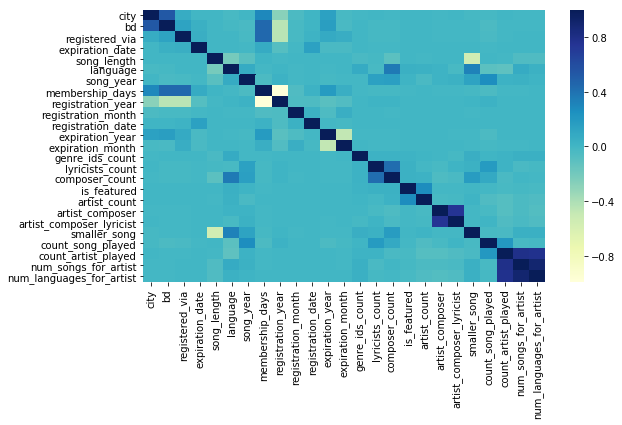

In [78]:
#plt.figure(figsize=[7,5])
sns.heatmap(train1.corr(), cmap="YlGnBu")
plt.show()

In [32]:
# core = train1.corr() 
# c1 = core.abs().unstack()
# c1.sort_values(ascending = False)

## highly correlated pair and features to drop:
1. registered_via, drop: membership_days,	registration_year
2. expiration_month, drop: expiration_year
3. song_length, drop: smaller_song
4. artist_composer_lyricist, drop: artist_composer	
5. lyricists_count,	drop: composer_count
6. count_artist_played, drop: num_songs_for_artist,	num_languages_for_artist

In [7]:
train.drop(['membership_days','registration_year','expiration_year','smaller_song',
           'artist_composer','composer_count','num_songs_for_artist','num_languages_for_artist'], axis = 1, inplace = True)

test.drop(['membership_days','registration_year','expiration_year','smaller_song',
           'artist_composer','composer_count','num_songs_for_artist','num_languages_for_artist'], axis = 1, inplace = True)

train.to_csv("deleted_0.4_correlated_feature_train.csv", index = False)
test.to_csv("deleted_0.4_correlated_feature_test.csv", index = False)

### Final Correlation map

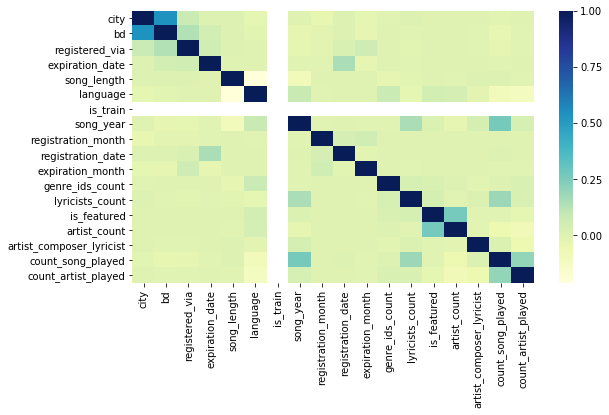

In [8]:
sns.heatmap(train.corr(), cmap="YlGnBu")
plt.show()

# On cleaned dataset

In [2]:
train = pd.read_csv("deleted_0.4_correlated_feature_train.csv")
test = pd.read_csv("deleted_0.4_correlated_feature_test.csv")

### one hot encoding 

In [3]:
train['city'] = train['city'].astype('category')
train['registered_via'] = train['registered_via'].astype('category')
train['language'] = train['language'].astype('category')

In [25]:
test['city'] = test['city'].astype('category')
test['registered_via'] = test['registered_via'].astype('category')
test['language'] = test['language'].astype('category')

In [54]:
train1 = train.copy()

In [48]:
test1 = test.copy()

In [13]:
train1.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,is_train,song_year,registration_month,registration_date,expiration_month,genre_ids_count,lyricists_count,is_featured,artist_count,artist_composer_lyricist,count_song_played,count_artist_played
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,0.0,unknown,7.0,2012-01-02,5,206471.0,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52.0,Good Grief,GBUM71602854,1,2016.0,1,2,10,1,0,0,0,0,215,1140
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,15.0,18.0,male,4.0,2015-12-20,30,206471.0,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52.0,Good Grief,GBUM71602854,1,2016.0,12,20,9,1,0,0,0,0,215,1140
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,0.0,unknown,7.0,2012-08-04,4,206471.0,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52.0,Good Grief,GBUM71602854,1,2016.0,8,4,10,1,0,0,0,0,215,1140
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,5.0,21.0,female,9.0,2011-08-08,17,206471.0,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52.0,Good Grief,GBUM71602854,1,2016.0,8,8,9,1,0,0,0,0,215,1140
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,6.0,33.0,female,9.0,2007-03-23,15,206471.0,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52.0,Good Grief,GBUM71602854,1,2016.0,3,23,9,1,0,0,0,0,215,1140


#### one hot encoding: 
- source_system_tab
- source_screen_name
- source_type
- city
- bd
- gender
- registered_via 
- language

#### drop: 
- genre_ids
- artist_name
- composer
- lyricist
- name
- isrc

In [55]:
train1 = train1.drop(['genre_ids', 'artist_name', 'composer', 'lyricist', 'name', 'isrc'], axis = 1)

In [49]:
test1 = test1.drop(['genre_ids', 'artist_name', 'composer', 'lyricist', 'name', 'isrc'], axis = 1)

In [6]:
train1.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'language',
       'is_train', 'song_year', 'registration_month', 'registration_date',
       'expiration_month', 'genre_ids_count', 'lyricists_count', 'is_featured',
       'artist_count', 'artist_composer_lyricist', 'count_song_played',
       'count_artist_played'],
      dtype='object')

In [56]:
k = train1[['msno', 'song_id','registration_init_time', 'expiration_date', 'song_length', 'bd',
       'is_train', 'song_year', 'registration_month', 'registration_date',
       'expiration_month', 'genre_ids_count', 'lyricists_count', 'is_featured',
       'artist_count', 'artist_composer_lyricist', 'count_song_played',
       'count_artist_played']]

In [50]:
m = test1[['msno', 'song_id','registration_init_time', 'expiration_date', 'song_length', 'bd',
       'is_train', 'song_year', 'registration_month', 'registration_date',
       'expiration_month', 'genre_ids_count', 'lyricists_count', 'is_featured',
       'artist_count', 'artist_composer_lyricist', 'count_song_played',
       'count_artist_played']]

In [59]:
s = train1[['source_system_tab','source_screen_name','source_type','city','gender','registered_via','language']]
dummies = pd.get_dummies(s, drop_first = True)

In [61]:
n = test1[['source_system_tab','source_screen_name','source_type','city','gender','registered_via','language']]
dummy = pd.get_dummies(n, drop_first = True)

In [60]:
dummies.shape

(7377418, 76)

In [62]:
dummy.shape

(2556790, 77)

In [63]:
dummies.columns

Index(['source_system_tab_explore', 'source_system_tab_listen with',
       'source_system_tab_my library', 'source_system_tab_notification',
       'source_system_tab_others', 'source_system_tab_radio',
       'source_system_tab_search', 'source_system_tab_settings',
       'source_screen_name_Artist more', 'source_screen_name_Concert',
       'source_screen_name_Discover Chart',
       'source_screen_name_Discover Feature',
       'source_screen_name_Discover Genre', 'source_screen_name_Discover New',
       'source_screen_name_Explore', 'source_screen_name_Local playlist more',
       'source_screen_name_My library', 'source_screen_name_My library_Search',
       'source_screen_name_Online playlist more',
       'source_screen_name_Others profile more', 'source_screen_name_Payment',
       'source_screen_name_Radio', 'source_screen_name_Search',
       'source_screen_name_Search Home', 'source_screen_name_Search Trends',
       'source_screen_name_Self profile more', 'source_screen_

In [68]:
print('present in both: ', len(set(dummies.columns.tolist()) & set(dummy.columns.tolist())))


print('Only in train but not in intersection: ', len(set(dummies.columns.tolist()) - (set(dummy.columns.tolist()) & set(dummies.columns.tolist()))))

print('Only in test but not in intersection: ', len(set(dummy.columns.tolist()) - (set(dummy.columns.tolist()) & set(dummies.columns.tolist()))))

present in both:  76
Only in train but not in intersection:  0
Only in test but not in intersection:  1


In [69]:
set(dummy.columns.tolist()) - (set(dummy.columns.tolist()) & set(dummies.columns.tolist()))

{'registered_via_16.0'}

In [72]:
train1.registered_via.value_counts()

9.0     2814535
7.0     2551743
3.0     1250790
4.0      745251
13.0      15099
Name: registered_via, dtype: int64

In [73]:
test1.registered_via.value_counts()

9.0     955111
7.0     901200
3.0     418950
4.0     274348
13.0      7179
16.0         2
Name: registered_via, dtype: int64

In [74]:
dummy = dummy.drop('registered_via_16.0', axis = 1)

In [76]:
dummy.shape

(2556790, 76)

In [44]:
dummies.head()

,bd,source_system_tab_discover,source_system_tab_explore,source_system_tab_listen with,source_system_tab_my library,source_system_tab_notification,source_system_tab_others,source_system_tab_radio,source_system_tab_search,source_system_tab_settings,source_screen_name_Album more,source_screen_name_Artist more,source_screen_name_Concert,source_screen_name_Discover Chart,source_screen_name_Discover Feature,source_screen_name_Discover Genre,source_screen_name_Discover New,source_screen_name_Explore,source_screen_name_Local playlist more,source_screen_name_My library,source_screen_name_My library_Search,source_screen_name_Online playlist more,source_screen_name_Others profile more,source_screen_name_Payment,source_screen_name_Radio,source_screen_name_Search,source_screen_name_Search Home,source_screen_name_Search Trends,source_screen_name_Self profile more,source_screen_name_Unknown,source_screen_name_other_sources,source_type_album,source_type_artist,source_type_listen-with,source_type_local-library,source_type_local-playlist,source_type_my-daily-playlist,source_type_online-playlist,source_type_other_types,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_topic-article-playlist,city_1.0,city_3.0,city_4.0,city_5.0,city_6.0,city_7.0,city_8.0,city_9.0,city_10.0,city_11.0,city_12.0,city_13.0,city_14.0,city_15.0,city_16.0,city_17.0,city_18.0,city_19.0,city_20.0,city_21.0,city_22.0,gender_female,gender_male,gender_unknown,registered_via_3.0,registered_via_4.0,registered_via_7.0,registered_via_9.0,registered_via_13.0,language_-1.0,language_0.0,language_3.0,language_10.0,language_17.0,language_24.0,language_31.0,language_38.0,language_45.0,language_52.0,language_59.0
0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,33.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
k.shape

(7377418, 18)

In [78]:
m.shape

(2556790, 18)

In [79]:
dummies.shape

(7377418, 76)

In [80]:
dummy.shape

(2556790, 76)

In [81]:
data1 = pd.concat([k, dummies], axis=1)

In [82]:
data2 = pd.concat([m, dummy], axis=1)

In [83]:
data1.shape

(7377418, 94)

In [84]:
data2.shape

(2556790, 94)

In [85]:
data1.to_csv("cleaned_one_hot_encoded_train.csv", index = False)

In [86]:
data2.to_csv("cleaned_one_hot_encoded_test.csv", index = False)

In [87]:
train_target = pd.read_csv("df_train_target.csv")
test_id = pd.read_csv("df_test_id.csv")

In [88]:
train_target.shape

(7377418, 1)

In [89]:
train_target.head()

,target
0,1
1,1
2,1
3,1
4,1


In [90]:
test_id.shape

(2556790, 1)

In [91]:
final_train1 = pd.concat([data1, train_target], axis=1)

In [92]:
final_train1.shape

(7377418, 95)

In [95]:
final_test1 = pd.concat([data2, test_id], axis=1)

In [96]:
final_test1.shape

(2556790, 95)

In [97]:
final_train1.to_csv("cleaned_one_hot_encoded_train_w_target.csv", index = False)

In [98]:
final_test1.to_csv("cleaned_one_hot_encoded_test_w_id.csv", index = False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


#import xgboost as xgb

# Additional tweaking
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

#sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [2]:
train_final= pd.read_csv("cleaned_one_hot_encoded_train_w_target.csv")
test_final = pd.read_csv("cleaned_one_hot_encoded_test_w_id.csv")

In [3]:
X5 = train_final.drop(['registration_init_time', 'msno', 'song_id', 'target'], axis=1)
Y5 = train_final['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X5, Y5, test_size=0.3, random_state=100)

In [4]:
X5.head()

,expiration_date,song_length,bd,is_train,song_year,registration_month,registration_date,expiration_month,genre_ids_count,lyricists_count,...,language_0.0,language_3.0,language_10.0,language_17.0,language_24.0,language_31.0,language_38.0,language_45.0,language_52.0,language_59.0
0,5,206471.0,0.0,1,2016.0,1,2,10,1,0,...,0,0,0,0,0,0,0,0,1,0
1,30,206471.0,18.0,1,2016.0,12,20,9,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,206471.0,0.0,1,2016.0,8,4,10,1,0,...,0,0,0,0,0,0,0,0,1,0
3,17,206471.0,21.0,1,2016.0,8,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0
4,15,206471.0,33.0,1,2016.0,3,23,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
X5.shape

(7377418, 91)

In [5]:
D = []
i = 0

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
training_accuracy=logreg.score(x_train,y_train)
a = round( training_accuracy* 100, 2)
testing_accuracy=logreg.score(x_test,y_test)
b = round(testing_accuracy * 100, 2)
i = 'Logistic Regression'
D.append([i, a, b])
print('Finished LR model')

# Linear Support Vector Machines
# clf = LinearSVC(random_state=0)
# clf.fit(x_train, y_train)
# Y_pred = clf.predict(x_test)
# training_accuracy=clf.score(x_train,y_train)
# a = round( training_accuracy* 100, 2)
# testing_accuracy=clf.score(x_test,y_test)
# b = round(testing_accuracy * 100, 2)
# i = 'Linear SVM'
# D.append([i, a, b])
# print('Finished Linear SVM model')

# KNN
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(x_train, y_train)
# Y_pred = knn.predict(x_test)
# training_accuracy=knn.score(x_train, y_train)
# a = round( training_accuracy* 100, 2)
# testing_accuracy=knn.score(x_test,y_test)
# b = round(testing_accuracy * 100, 2)
# i = 'KNN'
# D.append([i, a, b])
# print('Finished KNN model')

# XGBoost
# gradboost = xgb.XGBClassifier(n_estimators=1000)
# gradboost.fit(x_train, y_train)
# Y_pred = gradboost.predict(x_test)
# training_accuracy=gradboost.score(x_train,y_train)
# a = round( training_accuracy* 100, 2)
# testing_accuracy=gradboost.score(x_test,y_test)
# b = round(testing_accuracy * 100, 2)
# i = 'XGBoost'
# D.append([i, a, b])
# print('Finished XGB model')



Finished LR model


In [8]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 10)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
training_accuracy=random_forest.score(x_train,y_train)
a = round( training_accuracy* 100, 2)
testing_accuracy=random_forest.score(x_test,y_test)
b = round(testing_accuracy * 100, 2)
i = 'Random Forest'
D.append([i, a, b])
print('Finished RF model')

Finished RF model


In [9]:
dt = pd.DataFrame(D, columns=['Type of Model','Training error','Testing error'])
dt

,Type of Model,Training error,Testing error
0,Logistic Regression,51.91,51.91
1,Random Forest,98.10,53.69
2,Random Forest,53.75,53.65


# For random forest model: 

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
training_accuracy=random_forest.score(x_train,y_train)
a = round(training_accuracy* 100, 2)
testing_accuracy=random_forest.score(x_test,y_test)
b = round(testing_accuracy * 100, 2)

print("Trainning data accuracy: ", a)
print("Testing data accuracy: ", b)

print(confusion_matrix(y_test, Y_pred)) 

#print('roc score is: ', roc_auc_score(y5_test, Y_pred))

features = x_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)[-10:]

plt.title('Feature Importances')
plt.barh(range(10), importances[indices], color='b', align='edge')
plt.yticks(range(10), features[indices])
plt.xlabel('Relative Importance')
offset = 100

plt.figure(figsize=(50, 10))  # width:20, height:3
plt.show()

In [ ]:
rf_coefs = pd.DataFrame(random_forest.feature_importances_.T)
rf_coefs.columns=['feature_importance']
rf_coefs['feature_name'] = x_train.columns
rf_coefs.sort_values(by = ['feature_importance'], ascending=False)

In [ ]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(x5_train, y5_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
grid_search.cv_results_

In [ ]:
rf = grid_search.best_estimator_
rf.fit(x5_train, y5_train)
Y_pred = rf.predict(x5_test)
rf.score(x5_train, y5_train)
training_accuracy=rf.score(x5_train,y5_train)
a = round( training_accuracy* 100, 2)
testing_accuracy=rf.score(x5_test,y5_test)
b = round(testing_accuracy * 100, 2)



In [ ]:
print("Trainning data accuracy: ", a)
print("Testing data accuracy: ", b)